In [1]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path
from notebooks.showcase.slicer import SpectrumSlicer

### 1. Set up data

In [2]:
main_folder = Path("~//data/alphadia-validate/").expanduser()

In [3]:
from notebooks.showcase.io import prepare_data

precursor_df, spectral_library, spectral_library_flat, dia_data = prepare_data(
    main_folder
)

/Users/mschwoerer/data/alphadia-validate/data/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_07.raw already exists
/Users/mschwoerer/data/alphadia-validate/output/precursors.tsv already exists
/Users/mschwoerer/data/alphadia-validate/output/speclib.hdf already exists


49it [00:17,  2.80it/s]


In [4]:
# user input: select a hash
selected_hash = precursor_df["mod_seq_charge_hash"].iloc[3000]

# alternatively: use a random one from a certain percentile
# from notebooks.magnus_utils.small_helpers import get_random_precursor_hash
# selected_hash = get_random_precursor_hash(precursor_df, 0)

## 2. Preprocess

In [5]:
library_wrapper = SpectrumSlicer(spectral_library_flat, precursor_df, dia_data)

mz_library, intensity_library, spectrum_slice = library_wrapper.get_by_hash(
    selected_hash
)

## 3. Simple plots

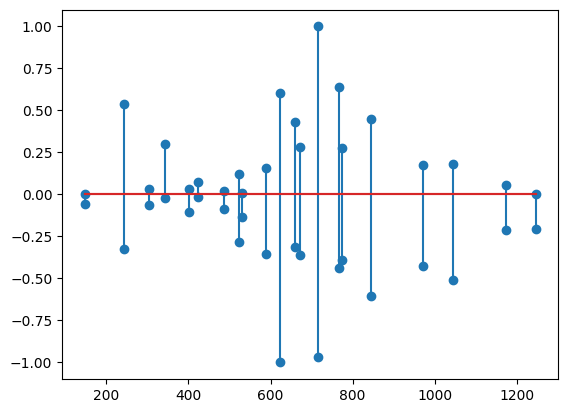

In [6]:
from notebooks.showcase.plots_original import plot_simple_mirror

plot_simple_mirror(spectrum_slice, intensity_library, mz_library)

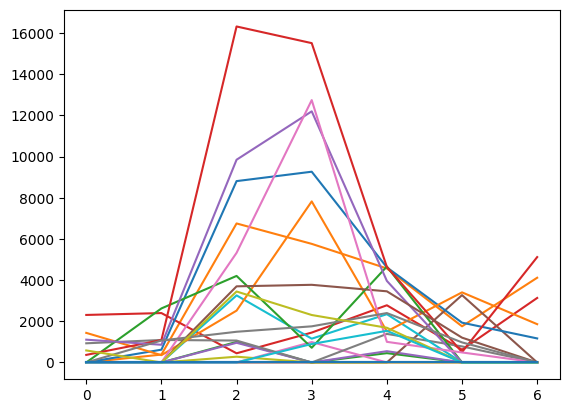

In [7]:
from notebooks.showcase.plots_original import plot_simple_xic

plot_simple_xic(spectrum_slice)

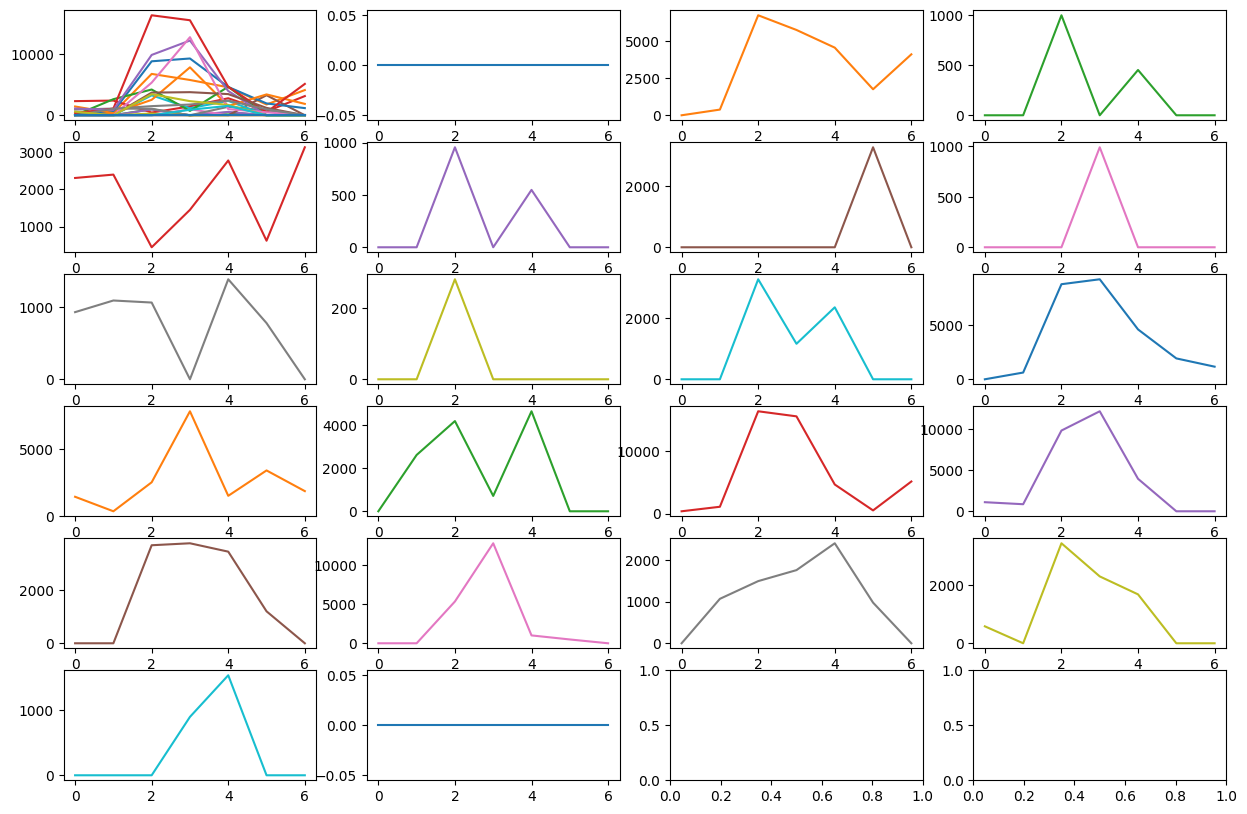

In [8]:
from notebooks.magnus_utils.xic_plots import plot_all_xics

plot_all_xics(spectrum_slice)

In [9]:
from notebooks.mirror_plotting import plot_mirror_byRT

plot_mirror_byRT(spectrum_slice, mz_library, intensity_library,  width=800, height=300)

alt.LayerChart(...)